## Support Vector Machine - Classification (SVM)

A Support Vector Machine (SVM) performs classification by finding the hyperplane that maximizes the margin between the two classes. The vectors (cases) that define the hyperplane are the support vectors.

<img src='../../../img/SVM_2.png' height="600" width="800">

__Algorithm :__
1. Define an optimal hyperplane: maximize margin
2. Extend the above definition for non-linearly separable problems: have a penalty term for misclassifications.
3. Map data to high dimensional space where it is easier to classify with linear decision surfaces: reformulate problem so that data is mapped implicitly to this space.

To define an optimal hyperplane we need to maximize the width of the margin (w).

<img src='../../../img/SVM_optimize.png' height="600" width="800">

We find w and b by solving the following objective function using Quadratic Programming.

<img src='../../../img/SVM_optimize_2.png'>

The beauty of SVM is that if the data is linearly separable, there is a unique global minimum value. An ideal SVM analysis should produce a hyperplane that completely separates the vectors (cases) into two non-overlapping classes. 

However, perfect separation may not be possible, or it may result in a model with so many cases that the model does not classify correctly. In this situation SVM finds the hyperplane that maximizes the margin and minimizes the misclassifications.

<img src='../../../img/SVM_3.png' height="600" width="800">

The simplest way to separate two groups of data is with a straight line (1 dimension), flat plane (2 dimensions) or an N-dimensional hyperplane. However, there are situations where a nonlinear region can separate the groups more efficiently. SVM handles this by using a kernel function (nonlinear) to map the data into a different space where a hyperplane (linear) cannot be used to do the separation. It means a non-linear function is learned by a linear learning machine in a high-dimensional feature space while the capacity of the system is controlled by a parameter that does not depend on the dimensionality of the space. This is called kernel trick which means the kernel function transform the data into a higher dimensional feature space to make it possible to perform the linear separation.  

<img src='../../../img/SVM_4.png' height="600" width="800">

<img src='../../../img/SVM_kernel.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`SVC()` | Support Vector Classification.
`ListedColormap` | Define color palette to plot with.
`.meshgrid()` | Make a pair combination of multiple array.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Seun.Adekunle\AppData\Local\Continuum\anaconda3\envs\glueviz\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [3]:
y_pred = classifier.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
confusion_matrix(y_test, y_pred)

array([[66,  2],
       [ 8, 24]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


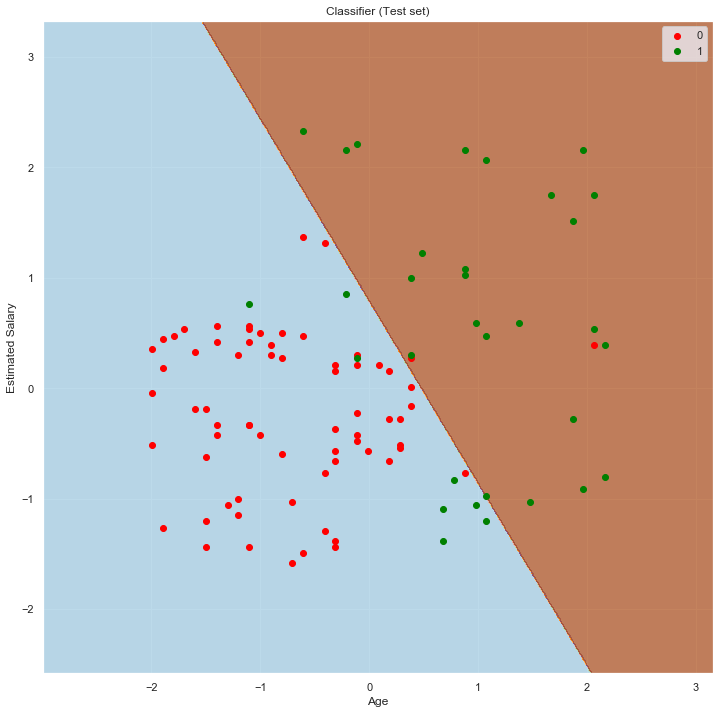

In [7]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
plt.figure(figsize=(12,12))
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.Paired)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
# In order gain more intuition about how we are splitting our grid: we'll build the plot_estimator 

def plot_estimator(estimator,X,y):
    estimator.fit(X,y)
    # ? 
    x_min, x_max =X[:,0].min() -.1, X[:,0].max() +.1
    y_min, y_max =X[:,1].min() -.1, X[:,1].max() +.1
    xx, yy =np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # perform classification on our samples
    Z= estimator.predict(np.c_[xx.ravel(), yy.ravel()])
                        
    # Put the result into a color plot
    Z=Z.reshape (xx.shape)
    plt.figure(figsize=(12,12))
    plt.pcolormesh(xx,yy, Z, cmap=plt.cm.Paired)
                        
    # Lets plot our sample points
    plt.scatter(X[:,0], X[:,1], c = ListedColormap(('red', 'green'))(y))

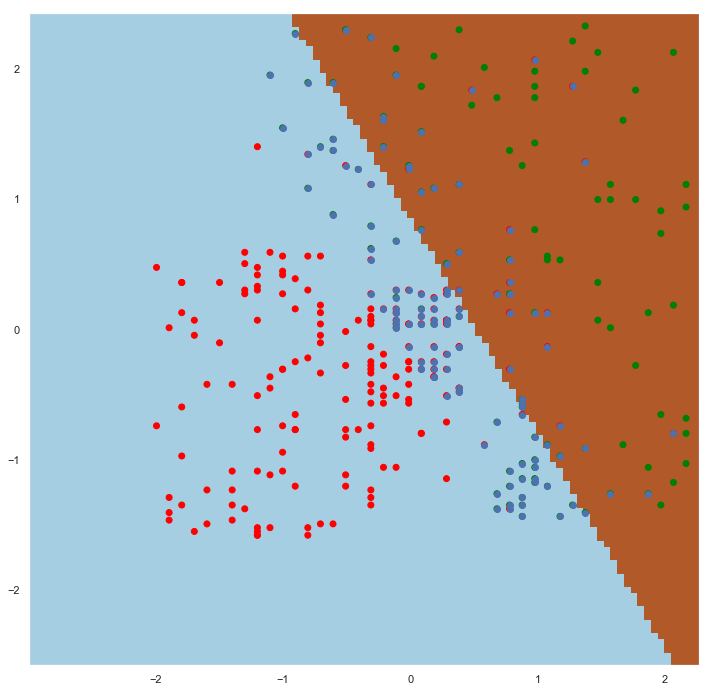

In [12]:
# Visualizing our Support Vectors and C (bias)

# Note that svm.LinearSVC uses the one vs. all methodology 
# where SVC implements one vs one 

plot_estimator(classifier,X_train, y_train)
# and then plot actually data points
plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1])

### Different Types of Kernels

- scikit-learn provides us with several types of Kernels to work with:

1) 'linear' : Linear decision boundary
    
    
- Good to use when: there is a clear separation of data or  # of features is large, and # of samples are  relatively small (can prevent overfitting)
        
    
2) 'poly' : Polynomial decicion boundary (adjust the order via 'order' argument)
    
-  The implict feature space of a polynomial kernel is equivalent to that of a polynomial regression                  (except that we do not have to worry about the combinatorial blow-up thanks due to the sparse design of the support vectors)
    
3) 'rbf': Radial Basis Function decision boundary ( inserts Gaussian kernel at each support vector, we can adjust the Gaussian kernel via the Gamma Feature)
    
    
- Good to use when # of samples is large and features relatively small 

## Exercise

In [ ]:
# Given the (3) of types of kernels above, and our previous model above, build & plot 3 new models on pggm dataset using Universe_Returns_F1W and Price_USD as input and sales_growth_class as output like the logistic regression exercise 
# Which do you think is more suitable for our data ?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the pggm dataset
pggm = pd.read_csv('http://bit.ly/PGGM_dataset')

In [3]:
pggm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38304 entries, 0 to 38303
Data columns (total 18 columns):
Identifier               38304 non-null object
Name                     38304 non-null object
Period                   38304 non-null object
Period_YYYYMMDD          38304 non-null int64
Ticker                   38304 non-null object
Universe_Returns_F1W     38300 non-null float64
Universe_Returns_F4W     38296 non-null float64
Universe_Returns_F12W    38268 non-null float64
Weight                   38304 non-null float64
GICS_Sector              38304 non-null object
GICS_Ind_Grp             38304 non-null object
Market_Cap_USD           38304 non-null float64
Price_USD                38304 non-null float64
NTM_EP                   38246 non-null float64
LTM_ROA                  38245 non-null float64
BP                       38288 non-null float64
LTM_EP                   38215 non-null float64
5Y_Sales_Growth          38197 non-null float64
dtypes: float64(11), int64(1), obje

In [4]:
# Remove missing data
pggm = pggm.dropna()

In [5]:
pggm['sales_growth_class'] = np.where(pggm['5Y_Sales_Growth']>=0, 1, -1)

In [6]:
pggm.head()

,Identifier,Name,Period,Period_YYYYMMDD,Ticker,Universe_Returns_F1W,Universe_Returns_F4W,Universe_Returns_F12W,Weight,GICS_Sector,GICS_Ind_Grp,Market_Cap_USD,Price_USD,NTM_EP,LTM_ROA,BP,LTM_EP,5Y_Sales_Growth,sales_growth_class
0,17290810,Cintas Corporation,12/31/2014,20141231,CTAS-US,-2.517855,-0.121111,4.156041,0.000402,Industrials,Commercial & Professional Services,7761.120,78.44,0.044387,9.089989,0.246962,0.042708,4.718765,1
1,80589M10,SCANA Corporation,12/31/2014,20141231,SCG-US,2.036428,6.307948,-8.426744,0.000422,Utilities,Utilities,8151.001,60.40,0.061397,3.472852,0.572871,0.062748,-0.949881,-1
2,50241310,L-3 Communications Holdings Inc.,12/31/2014,20141231,LLL-US,-0.396162,-1.283580,-0.753021,0.000563,Industrials,Capital Goods,10883.341,126.21,0.060554,4.744629,0.570099,0.059821,-4.316938,-1
3,91301710,United Technologies Corporation,12/31/2014,20141231,UTX-US,-1.973909,1.669562,1.815629,0.005174,Industrials,Capital Goods,99942.990,115.00,0.062889,6.805052,0.325584,0.059088,3.083364,1
4,92939U10,Wisconsin Energy Corporation,12/31/2014,20141231,WEC-US,1.118696,7.679176,-6.160975,0.000616,Utilities,Utilities,11893.872,52.74,0.051359,4.201019,0.369798,0.050815,1.421392,1


In [7]:
X = pggm.iloc[:, [5,12]]
y = pggm.iloc[:, 18] 

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[   0, 1692],
       [   0, 5914]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.7775440441756508


In [15]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.773602892833662


In [ ]:
classifier = SVC(kernel='poly', random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[1089,  617],
       [3006, 2894]], dtype=int64)

In [20]:
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.5236655272153563


In [21]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.5290927021696252


In [16]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred)

array([[   0, 1692],
       [   0, 5914]], dtype=int64)

In [19]:
print(accuracy_score(classifier.predict(X_test), y_test.values.reshape(-1, 1)))

0.7775440441756508


In [20]:
print(accuracy_score(classifier.predict(X_train), y_train.values.reshape(-1, 1)))

0.773602892833662
